# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import seaborn as sn


In [59]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

611

In [61]:

#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,edd,,,,,,,
1,laguna,,,,,,,
2,cherskiy,,,,,,,
3,anadyr,,,,,,,
4,komatsushima,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:
#perform API calls to check the weather of each city in our list

#empty list to populate, pass to df, and plot

city_list = []
temps = []
humidity = []
clouds = []
winds = []
lats = []
longs = []
countries = []
date = []

#set url via f-strings literal

units = 'imperial'
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

In [63]:
# iterate through cities list to populate the empty df lists above by API requests

#set loop counters
counter = 0
set_counter = 1

for i in cities:
    try:
        response = requests.get(base_url + i.replace(" ","&")).json()
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        date.append(response['dt'])
        if counter > 48:
            counter = 1
            set_counter += 1
            city_list.append(i)
        else:
            counter += 1
            city_list.append(i)
        print(f"Processing Record # : {counter} of Set {set_counter} | {i}")
    except:
        print("City not found. Skipping request...")
print("------------------------------\nData API Response Complete\n------------------------------")

Processing Record # : 1 of Set 1 | edd
Processing Record # : 2 of Set 1 | laguna
Processing Record # : 3 of Set 1 | cherskiy
Processing Record # : 4 of Set 1 | anadyr
Processing Record # : 5 of Set 1 | komatsushima
Processing Record # : 6 of Set 1 | ponta do sol
Processing Record # : 7 of Set 1 | blagoyevo
Processing Record # : 8 of Set 1 | mehamn
Processing Record # : 9 of Set 1 | bambous virieux
Processing Record # : 10 of Set 1 | puerto ayora
Processing Record # : 11 of Set 1 | east london
Processing Record # : 12 of Set 1 | khani
Processing Record # : 13 of Set 1 | hithadhoo
Processing Record # : 14 of Set 1 | jamestown
Processing Record # : 15 of Set 1 | new norfolk
Processing Record # : 16 of Set 1 | halifax
Processing Record # : 17 of Set 1 | nikolsk
Processing Record # : 18 of Set 1 | hilo
Processing Record # : 19 of Set 1 | rikitea
Processing Record # : 20 of Set 1 | toktogul
Processing Record # : 21 of Set 1 | severo-kurilsk
Processing Record # : 22 of Set 1 | sabratah
Proces

Processing Record # : 24 of Set 4 | port-cartier
Processing Record # : 25 of Set 4 | aykhal
Processing Record # : 26 of Set 4 | pandan
Processing Record # : 27 of Set 4 | kakonko
Processing Record # : 28 of Set 4 | waddan
Processing Record # : 29 of Set 4 | itoman
City not found. Skipping request...
Processing Record # : 30 of Set 4 | pevek
Processing Record # : 31 of Set 4 | marfino
Processing Record # : 32 of Set 4 | torbay
Processing Record # : 33 of Set 4 | high level
City not found. Skipping request...
Processing Record # : 34 of Set 4 | otukpo
Processing Record # : 35 of Set 4 | manikpur
Processing Record # : 36 of Set 4 | abu jubayhah
Processing Record # : 37 of Set 4 | talcahuano
Processing Record # : 38 of Set 4 | port blair
Processing Record # : 39 of Set 4 | qaanaaq
Processing Record # : 40 of Set 4 | tokur
City not found. Skipping request...
Processing Record # : 41 of Set 4 | ringebu
Processing Record # : 42 of Set 4 | vila franca do campo
Processing Record # : 43 of Set 4

Processing Record # : 37 of Set 7 | carnarvon
Processing Record # : 38 of Set 7 | longyearbyen
Processing Record # : 39 of Set 7 | naryan-mar
City not found. Skipping request...
Processing Record # : 40 of Set 7 | jalu
Processing Record # : 41 of Set 7 | sept-iles
Processing Record # : 42 of Set 7 | paamiut
Processing Record # : 43 of Set 7 | pueblo
Processing Record # : 44 of Set 7 | zhigalovo
Processing Record # : 45 of Set 7 | bilma
Processing Record # : 46 of Set 7 | fereydun kenar
Processing Record # : 47 of Set 7 | havoysund
Processing Record # : 48 of Set 7 | manggar
Processing Record # : 49 of Set 7 | las vegas
Processing Record # : 1 of Set 8 | letlhakane
Processing Record # : 2 of Set 8 | kavaratti
Processing Record # : 3 of Set 8 | sonoita
Processing Record # : 4 of Set 8 | karpathos
Processing Record # : 5 of Set 8 | khandyga
Processing Record # : 6 of Set 8 | quelimane
Processing Record # : 7 of Set 8 | olavarria
Processing Record # : 8 of Set 8 | bathsheba
City not found.

Processing Record # : 12 of Set 11 | listvyagi
City not found. Skipping request...
Processing Record # : 13 of Set 11 | rawson
City not found. Skipping request...
City not found. Skipping request...
Processing Record # : 14 of Set 11 | rantoul
Processing Record # : 15 of Set 11 | haines junction
City not found. Skipping request...
City not found. Skipping request...
Processing Record # : 16 of Set 11 | taoudenni
Processing Record # : 17 of Set 11 | kieta
City not found. Skipping request...
Processing Record # : 18 of Set 11 | poum
Processing Record # : 19 of Set 11 | glens falls
Processing Record # : 20 of Set 11 | skibbereen
Processing Record # : 21 of Set 11 | abilene
City not found. Skipping request...
Processing Record # : 22 of Set 11 | yulara
Processing Record # : 23 of Set 11 | neryungri
Processing Record # : 24 of Set 11 | pangoa
City not found. Skipping request...
Processing Record # : 25 of Set 11 | divnomorskoye
Processing Record # : 26 of Set 11 | winona
City not found. Ski

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
#convert to raw df
weather_dict = {
    "City":city_list,
    "Lat":lats,
    "Lng":longs,
    "Max Temp":temps,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":winds,
    "Country":countries,
    "Date":date,   
}

In [77]:
weather_df = pd.DataFrame(weather_dict)

#export to csv
weather_df.to_csv('cities_new.csv',encoding = 'utf-8',index = False)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edd,13.9297,41.6925,89.04,69,90,5.84,ER,1630975611
1,laguna,38.4210,-121.4238,104.65,14,1,1.99,US,1630975611
2,cherskiy,68.7500,161.3000,33.89,83,100,17.60,RU,1630975611
3,anadyr,64.7500,177.4833,41.50,70,75,11.18,RU,1630975613
4,komatsushima,34.0000,134.5833,77.36,73,75,4.61,JP,1630975613


In [78]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,21.666959,22.529664,66.760738,71.472325,54.992620,7.125092,1.630976e+09
std,32.252760,85.791903,14.865447,20.992697,41.716497,5.136793,8.498869e+01
min,-54.800000,-175.200000,14.050000,11.000000,0.000000,0.000000,1.630975e+09
25%,-5.773575,-46.841075,56.102500,62.000000,7.250000,3.405000,1.630976e+09
50%,26.396350,27.423650,69.060000,76.000000,64.000000,5.950000,1.630976e+09
75%,48.790150,91.286450,78.757500,88.000000,100.000000,9.762500,1.630976e+09
max,78.218600,179.316700,104.650000,100.000000,100.000000,31.850000,1.630976e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [79]:
#check if there are any cities with >100% humidity
humidity_stats = weather_df["Humidity"].describe(include = "all")

humidity_stats

count    542.000000
mean      71.472325
std       20.992697
min       11.000000
25%       62.000000
50%       76.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

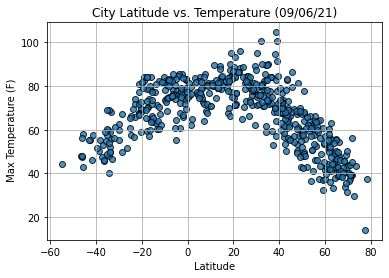

In [80]:
#temp vs latitude scatterplot, format time

plt.scatter(weather_df["Lat"], 
            weather_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel(" Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

## Latitude vs. Humidity Plot

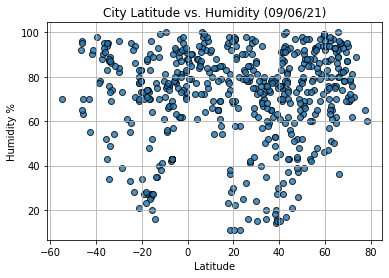

In [81]:
#humidity vs latitude scatterplot, format time

plt.scatter(weather_df["Lat"], 
            weather_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

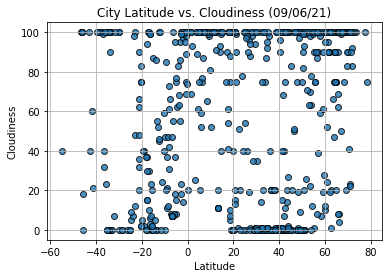

In [82]:
#cloudiness vs latitude scatterplot, format time

plt.scatter(weather_df["Lat"], 
            weather_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Cloudiness.png")

In [83]:
## Latitude vs. Wind Speed Plot

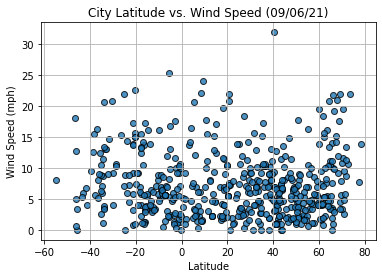

In [84]:
#Wind Speed vs latitude scatterplot, format time

plt.scatter(weather_df["Lat"], 
            weather_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs WindSpeed.png")

In [85]:
north_hemi_df = weather_df.loc[weather_df.Lat >= 0].reset_index(drop=True)
south_hemi_df = weather_df.loc[weather_df.Lat < 0].reset_index(drop=True)

north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edd,13.9297,41.6925,89.04,69,90,5.84,ER,1630975611
1,laguna,38.4210,-121.4238,104.65,14,1,1.99,US,1630975611
2,cherskiy,68.7500,161.3000,33.89,83,100,17.60,RU,1630975611
3,anadyr,64.7500,177.4833,41.50,70,75,11.18,RU,1630975613
4,komatsushima,34.0000,134.5833,77.36,73,75,4.61,JP,1630975613


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6215219571437433


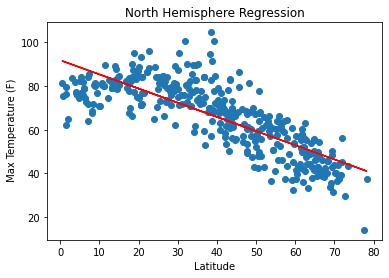

In [86]:
# LINREGRESS


# Print out the r-squared value along with the plot.
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Max Temperature (F)')
plt.title("North Hemisphere Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5844973130676379


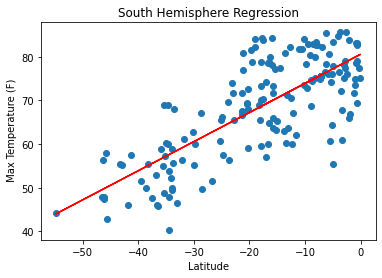

In [87]:
# LINREGRESS


# Print out the r-squared value along with the plot.
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Max Temperature (F)')
plt.title("South Hemisphere Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0016023087443809393


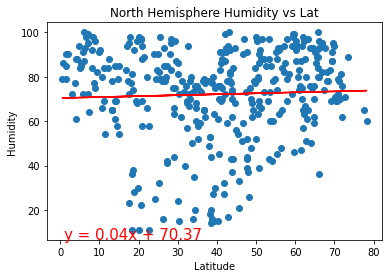

In [88]:
# LINREGRESS

# Print out the r-squared value along with the plot.
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("North Hemisphere Humidity vs Lat")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006789402110386084


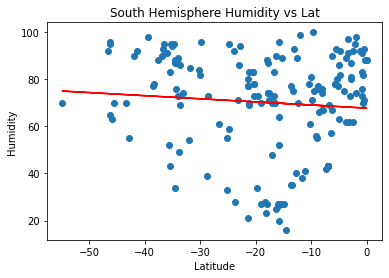

In [89]:
# LINREGRESS

# Print out the r-squared value along with the plot.
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("South Hemisphere Humidity vs Lat")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0013776468861676854


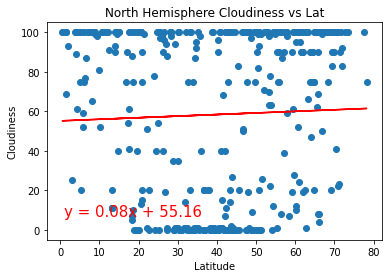

In [90]:
# LINREGRESS

# Print out the r-squared value along with the plot.
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("North Hemisphere Cloudiness vs Lat")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0004185834029365989


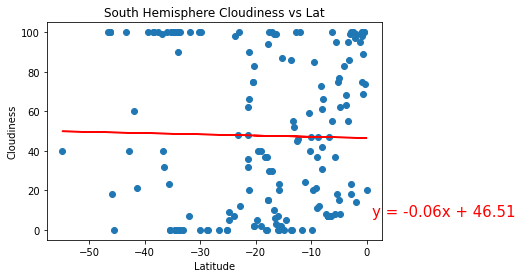

In [91]:
# LINREGRESS

# Print out the r-squared value along with the plot.
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("South Hemisphere Cloudiness vs Lat")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004992454646817202


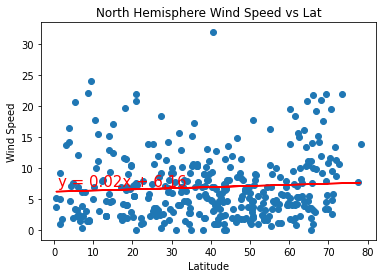

In [92]:
# LINREGRESS

# Print out the r-squared value along with the plot.
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("North Hemisphere Wind Speed vs Lat")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03214872871729832


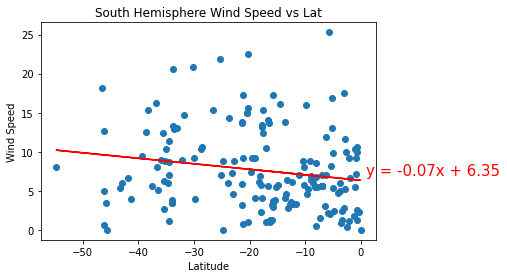

In [93]:
# LINREGRESS

# Print out the r-squared value along with the plot.
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("South Hemisphere Wind Speed vs Lat")
print(f"The r-squared is: {rvalue**2}")
plt.show()